<a href="https://colab.research.google.com/github/Lounes-Kheris98/diabete.predict/blob/main/Diabetes_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [238]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [216]:
def read_data(filename):
    df = pd.read_csv(filename)
    return df

from google.colab import files
upload = files.upload()

Saving diabetes.csv to diabetes.csv


In [217]:
def read_data(filename):
    df = pd.read_csv(filename)
    return df

data = read_data("diabetes.csv")

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,108,44,20,130,24.0,0.813,35,0
1,2,118,80,0,0,42.9,0.693,21,1
2,10,133,68,0,0,27.0,0.245,36,0
3,2,197,70,99,0,34.7,0.575,62,1
4,0,151,90,46,0,42.1,0.371,21,1


In [218]:
# Dataset dimensions - (rows, columns)
data.shape

(192, 9)

In [219]:
# Features data-type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               192 non-null    int64  
 1   Glucose                   192 non-null    int64  
 2   BloodPressure             192 non-null    int64  
 3   SkinThickness             192 non-null    int64  
 4   Insulin                   192 non-null    int64  
 5   BMI                       192 non-null    float64
 6   DiabetesPedigreeFunction  192 non-null    float64
 7   Age                       192 non-null    int64  
 8   Outcome                   192 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 13.6 KB


In [220]:
# Statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,192.0,3.958333,3.445664,0.000,1.00000,3.000,6.0000,13.000
Glucose,192.0,123.442708,29.941074,56.000,102.00000,120.000,141.2500,199.000
BloodPressure,192.0,70.000000,19.581218,0.000,62.00000,74.000,80.0000,114.000
SkinThickness,192.0,20.395833,16.883326,0.000,0.00000,22.500,32.0000,99.000
Insulin,192.0,79.531250,113.849993,0.000,0.00000,0.000,132.7500,600.000
BMI,192.0,32.294271,7.431384,0.000,27.57500,32.400,36.8000,57.300
DiabetesPedigreeFunction,192.0,0.447693,0.316884,0.088,0.22275,0.348,0.5935,1.699
Age,192.0,33.406250,11.741169,21.000,24.00000,28.500,42.0000,70.000
Outcome,192.0,0.364583,0.482571,0.000,0.00000,0.000,1.0000,1.000


In [221]:
#statistics description of the data
data.describe([0.10,0.25,0.5,0.75,0.9,0.95,0.99]).T


,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,192.0,3.958333,3.445664,0.000,0.0000,1.00000,3.000,6.0000,9.0000,10.4500,13.00000,13.000
Glucose,192.0,123.442708,29.941074,56.000,92.0000,102.00000,120.000,141.2500,168.9000,181.0000,195.18000,199.000
BloodPressure,192.0,70.000000,19.581218,0.000,52.2000,62.00000,74.000,80.0000,88.0000,92.9000,106.00000,114.000
SkinThickness,192.0,20.395833,16.883326,0.000,0.0000,0.00000,22.500,32.0000,41.0000,46.0000,49.09000,99.000
Insulin,192.0,79.531250,113.849993,0.000,0.0000,0.00000,0.000,132.7500,200.0000,291.9000,512.70000,600.000
BMI,192.0,32.294271,7.431384,0.000,24.1100,27.57500,32.400,36.8000,41.1700,44.2250,49.32700,57.300
DiabetesPedigreeFunction,192.0,0.447693,0.316884,0.088,0.1494,0.22275,0.348,0.5935,0.8773,1.1576,1.48233,1.699
Age,192.0,33.406250,11.741169,21.000,22.0000,24.00000,28.500,42.0000,50.0000,53.4500,68.09000,70.000
Outcome,192.0,0.364583,0.482571,0.000,0.0000,0.00000,0.000,1.0000,1.0000,1.0000,1.00000,1.000


In [222]:
# Count of null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


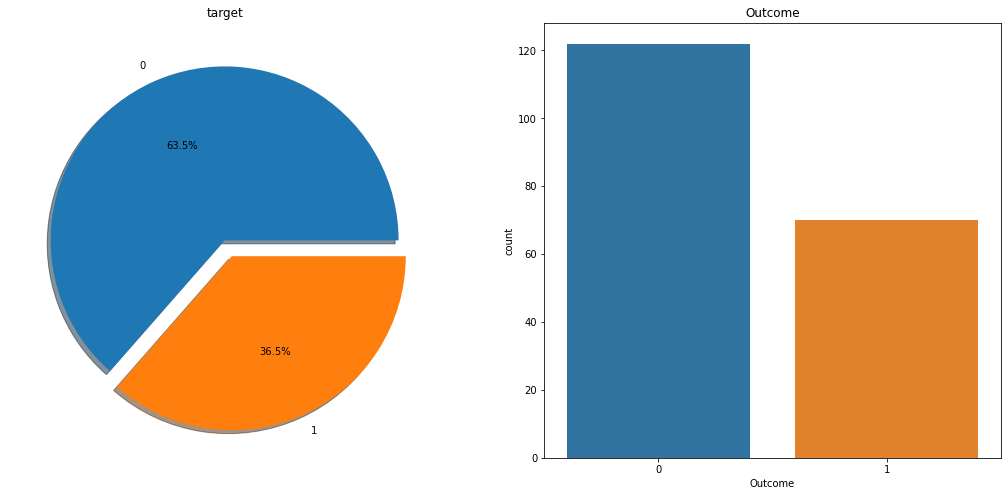

In [223]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=data,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [224]:
print(data["Outcome"].value_counts()*100/len(data))



0    63.541667
1    36.458333
Name: Outcome, dtype: float64


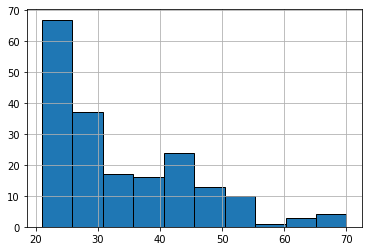

In [225]:
data["Age"].hist(edgecolor= "black")
plt.show()


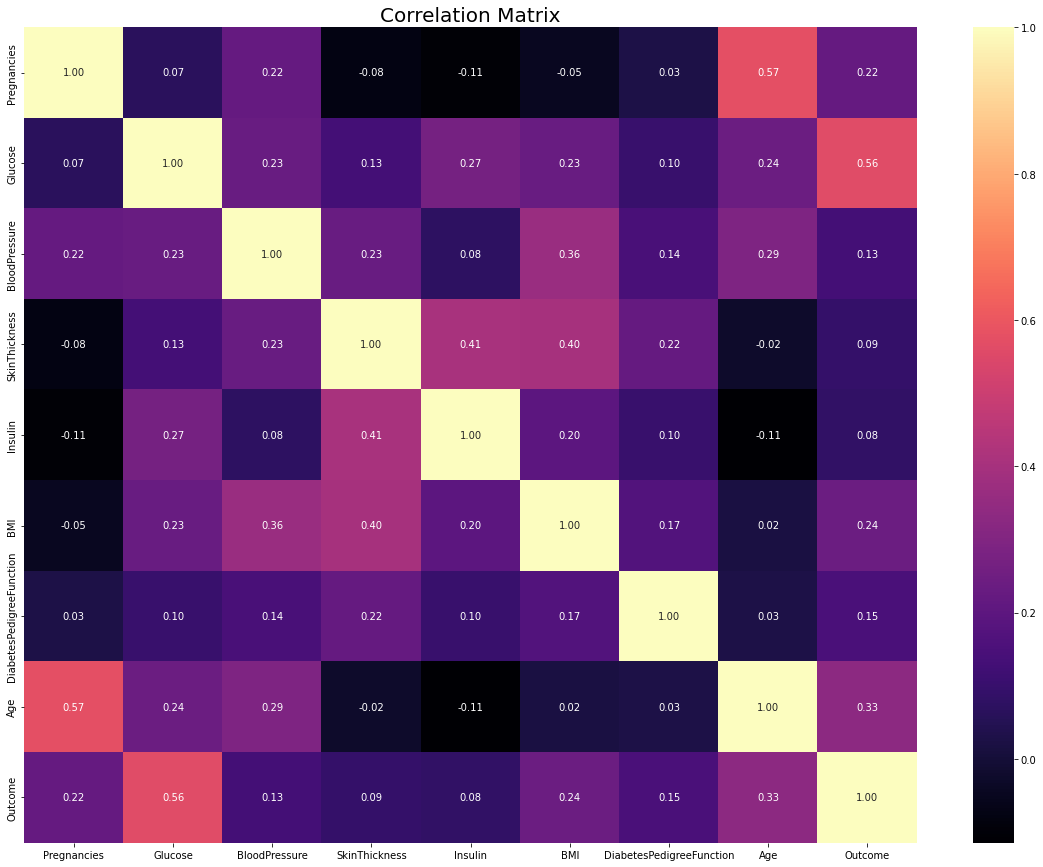

In [226]:
def plot_corr(df,size=11): 
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Yellow means that they are highly correlated.
                                           
    """
    '''corr = df.corr() # calling the correlation function on the datafrmae
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr) # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)),corr.columns) # draw x tickmarks
    plt.yticks(range(len(corr.columns)),corr.columns) # draw y tickmarks
    '''
    f, ax = plt.subplots(figsize= [20,15])
    sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
    ax.set_title("Correlation Matrix", fontsize=20)

plot_corr(data)

In [227]:
'''
  2 - preprocessing Data : 
    a - replace 0 in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
'''
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,108,44,20,130,24.0,0.813,35,0
1,2,118,80,0,0,42.9,0.693,21,1
2,10,133,68,0,0,27.0,0.245,36,0
3,2,197,70,99,0,34.7,0.575,62,1
4,0,151,90,46,0,42.1,0.371,21,1
...,...,...,...,...,...,...,...,...,...
187,10,101,76,48,180,32.9,0.171,63,0
188,2,122,70,27,0,36.8,0.340,27,0
189,5,121,72,23,112,26.2,0.245,30,0
190,1,126,60,0,0,30.1,0.349,47,1


In [228]:
replace_list_column = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

data_new = data
data_new[replace_list_column] = data[replace_list_column].replace(0, np.NaN)

#for i in data.index:
#print(data.loc[data['Insulin'].isin([0,2,4])])
import random


for col in replace_list_column: 
  max_Insulin = data[col].max()
  min_Insulin = data[col].min()

  data_new[col] = data_new[col].mask(data_new[col].isnull(), np.random.uniform(min_Insulin, max_Insulin, size=data_new[col].shape))

#data_new = data_new.dropna(axis=0, how='any')

data_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,108,44.0,20.000000,130.000000,24.0,0.813,35,0
1,2,118,80.0,51.243760,348.733584,42.9,0.693,21,1
2,10,133,68.0,68.086947,341.471278,27.0,0.245,36,0
3,2,197,70.0,99.000000,134.540227,34.7,0.575,62,1
4,0,151,90.0,46.000000,510.594813,42.1,0.371,21,1
...,...,...,...,...,...,...,...,...,...
187,10,101,76.0,48.000000,180.000000,32.9,0.171,63,0
188,2,122,70.0,27.000000,490.938869,36.8,0.340,27,0
189,5,121,72.0,23.000000,112.000000,26.2,0.245,30,0
190,1,126,60.0,31.294741,145.030073,30.1,0.349,47,1


In [229]:
data_new.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


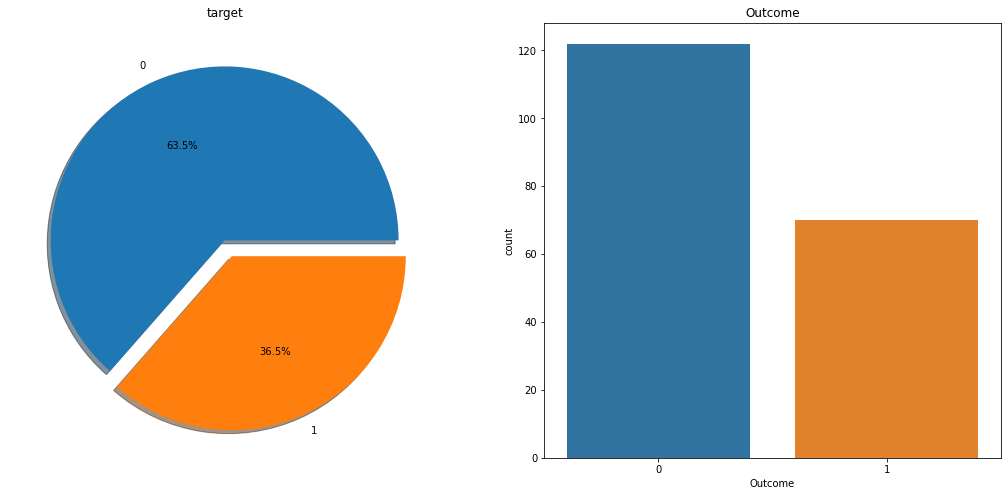

In [230]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data_new['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=data,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

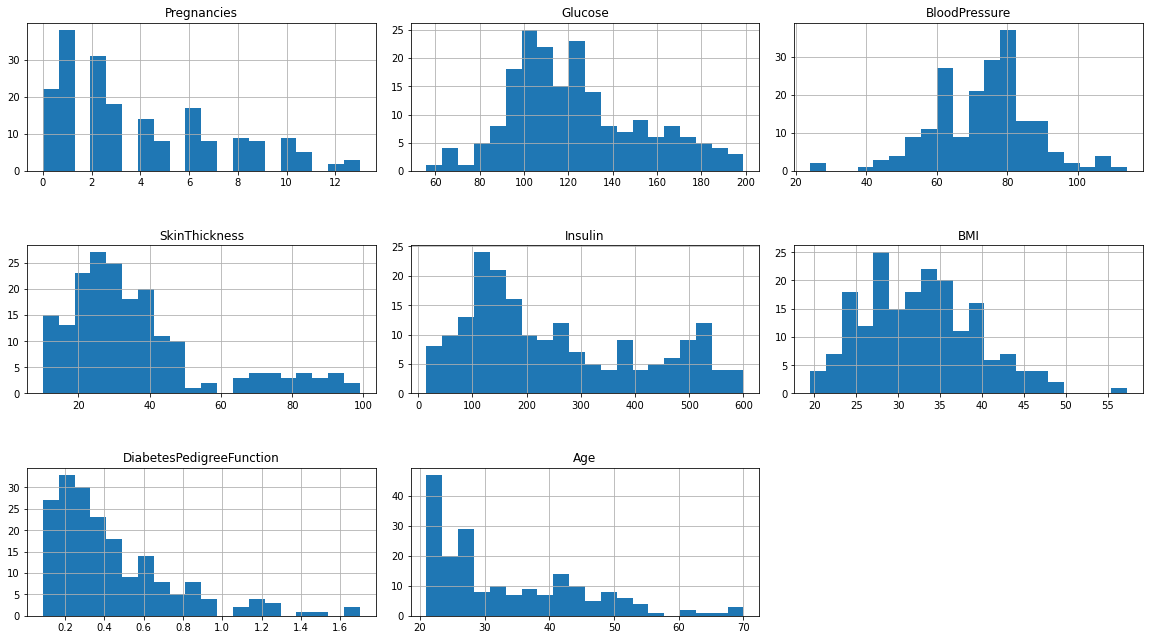

In [231]:
# Histogram of each feature
import itertools

col = data_new.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    data_new[i].hist(bins = 20)
    plt.title(i)
plt.show()

In [243]:
data_new = data_new['Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI']

KeyError: ignored

In [ ]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(data_new)

In [233]:
dataset_scaled = pd.DataFrame(dataset_scaled)
dataset_scaled

,0,1,2,3,4,5,6,7,8
0,0.461538,0.363636,0.222222,0.112360,0.196581,0.119048,0.450031,0.285714,0.0
1,0.153846,0.433566,0.622222,0.463413,0.570485,0.619048,0.375543,0.000000,1.0
2,0.769231,0.538462,0.488889,0.652662,0.558071,0.198413,0.097455,0.306122,0.0
3,0.153846,0.986014,0.511111,1.000000,0.204342,0.402116,0.302297,0.836735,1.0
4,0.000000,0.664336,0.733333,0.404494,0.847171,0.597884,0.175667,0.000000,1.0
...,...,...,...,...,...,...,...,...,...
187,0.769231,0.314685,0.577778,0.426966,0.282051,0.354497,0.051521,0.857143,0.0
188,0.153846,0.461538,0.511111,0.191011,0.813571,0.457672,0.156425,0.122449,0.0
189,0.384615,0.454545,0.533333,0.146067,0.165812,0.177249,0.097455,0.183673,0.0
190,0.076923,0.489510,0.400000,0.239267,0.222274,0.280423,0.162011,0.530612,1.0


In [234]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataset_scaled.iloc[:, [1, 4, 5, 7]].values
Y = dataset_scaled.iloc[:, 8].values

In [235]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = data_new['Outcome'] )

In [236]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (153, 4)
X_test shape: (39, 4)
Y_train shape: (153,)
Y_test shape: (39,)


DATA MODELLING


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


0.8205128205128205
0.7692307692307693
0.7948717948717948
0.8205128205128205
0.7948717948717948
0.8205128205128205
0.7948717948717948
0.8205128205128205
0.8205128205128205
0.7948717948717948
0.7692307692307693
0.7435897435897436
0.7692307692307693
0.7948717948717948
0.8205128205128205
0.8205128205128205
0.7948717948717948
0.7948717948717948
0.7948717948717948
0.7948717948717948
0.7692307692307693
0.7948717948717948
0.7948717948717948
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7948717948717948
0.8205128205128205
0.7948717948717948
0.7948717948717948
0.7948717948717948
0.7948717948717948
0.7435897435897436
0.7435897435897436
0.7692307692307693
0.717948717948718
0.717948717948718
0.717948717948718
0.717948717948718
0.717948717948718
0.717948717948718
0.717948717948718
0.717948717948718
0.717948717948718
0.6923076923076923
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6410256410256411
0.6410256410256411
0.6410256410256411
0.6410256410256411
0.

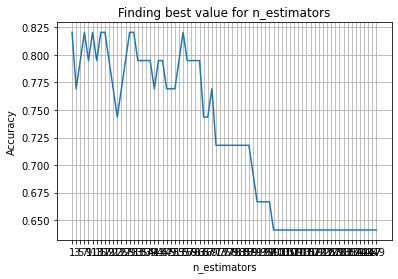

Highest value:  0.8205128205128205


In [241]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 150, 2))
acc = pd.Series()
x = range(1, 150, 2)

for i in list(range(1, 150, 2)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    print(metrics.accuracy_score(prediction, Y_test))
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))

plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [ ]:
# Calculate TP, FP, TN, FN, Accuracy and FPR
computeAccuracy(Y_test, predictions);